<a href="https://colab.research.google.com/github/X-ray-Dawgz/XRayDawgz/blob/rick/CNN_COVID20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/X-ray-Dawgz/XRayDawgz.git

Cloning into 'XRayDawgz'...
remote: Enumerating objects: 532, done.
remote: Counting objects: 100% (532/532), done.
remote: Compressing objects: 100% (512/512), done.
remote: Total 3643 (delta 54), reused 455 (delta 16), pack-reused 3111
Receiving objects: 100% (3643/3643), 26.97 MiB | 40.02 MiB/s, done.
Resolving deltas: 100% (238/238), done.


In [4]:
cd XRayDawgz/

/content/XRayDawgz


In [5]:
!git checkout rick

Branch 'rick' set up to track remote branch 'rick' from 'origin'.
Switched to a new branch 'rick'


In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image

import numpy as np
import os

Using TensorFlow backend.


In [0]:
# image size
img_width, img_height = 379,288
# train and test sample sizes
train_samples = 665
test_samples = 98
# set weights
epochs = 75
batch_size = 20
# Directories of train and test data
train_dir = 'cut_image/Train'
test_dir = 'cut_image/Test'

In [0]:
# data image augmentation to create more variation of XRD patterns
train_data = ImageDataGenerator(rescale=1. / 255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

# only resize for test data
test_data = ImageDataGenerator(rescale=1. / 255)

In [9]:
# import train data consisting of 'binary' or  2 classifications (BCC or FCC) 
train_gen = train_data.flow_from_directory(train_dir, target_size=(img_width, img_height),
                                           batch_size=batch_size,
                                           class_mode='binary')

Found 1330 images belonging to 2 classes.


In [10]:
# import test data consisting of 'binary' or  2 classifications (BCC or FCC) 
test_gen = test_data.flow_from_directory(test_dir, target_size=(img_width, img_height),
                                          batch_size=batch_size,
                                           class_mode='binary')

Found 196 images belonging to 2 classes.


In [23]:
# build CNN model
model = Sequential()
# extract features by iterating across image
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(ZeroPadding2D((1,1)))
#convert 3D features to 1D feature vectors
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 377, 286, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 377, 286, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 188, 143, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 186, 141, 32)      9248      
_________________________________________________________________
activation_17 (Activation)   (None, 186, 141, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 93, 70, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 91, 68, 64)       

In [0]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [29]:
cs_classification = model.fit_generator(train_gen,
                    steps_per_epoch=train_samples // batch_size,
                    epochs=epochs,
                    validation_data=test_gen,
                    validation_steps=test_samples // batch_size)

Epoch 1/75
33/33 [==============================] - 14s 422ms/step - loss: 0.3972 - acc: 0.8348 - val_loss: 0.3427 - val_acc: 0.8875
Epoch 2/75
33/33 [==============================] - 14s 415ms/step - loss: 0.4029 - acc: 0.8212 - val_loss: 0.3773 - val_acc: 0.8750
Epoch 3/75
33/33 [==============================] - 14s 416ms/step - loss: 0.3961 - acc: 0.8302 - val_loss: 0.3667 - val_acc: 0.8947
Epoch 4/75
33/33 [==============================] - 14s 426ms/step - loss: 0.3507 - acc: 0.8561 - val_loss: 0.4467 - val_acc: 0.8875
Epoch 5/75
33/33 [==============================] - 14s 419ms/step - loss: 0.3830 - acc: 0.8333 - val_loss: 0.4533 - val_acc: 0.7763
Epoch 6/75
33/33 [==============================] - 14s 420ms/step - loss: 0.4099 - acc: 0.8182 - val_loss: 0.4262 - val_acc: 0.8375
Epoch 7/75
33/33 [==============================] - 14s 412ms/step - loss: 0.4148 - acc: 0.8333 - val_loss: 0.4296 - val_acc: 0.8625
Epoch 8/75
33/33 [==============================] - 14s 423ms/step - 

In [0]:
model.save_weights('0.97 try')

In [33]:
ls

'0.97 try'                      cut_image/            img_prepare.ipynb
 change_size.ipynb              docs/                 LICENSE
 CNN_COVID19.ipynb              environment.yml       README.md
 CNN_COVID20.ipynb              image_prepare.py      Test/
 CNN_test_0312.ipynb            Image_Preprocess.py   XRayDawgz/
 CNN_test_3_convolution.ipynb   Images/


Accuracy: 0.91
Validation Accuracy: 0.97


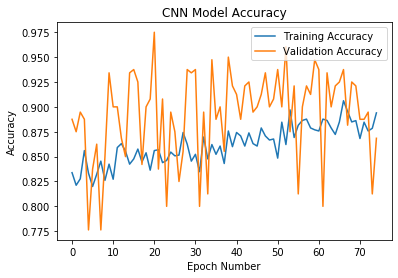

In [35]:
x = np.arange(0, epochs)
plt.figure()
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

plt.plot(x, cs_classification.history["acc"], label="Training Accuracy")
plt.plot(x, cs_classification.history["val_acc"], label="Validation Accuracy")
plt.title("CNN Model Accuracy")
plt.legend(loc="upper right")

print('Accuracy: %.2f' %(np.amax(cs_classification.history["acc"])))
print('Validation Accuracy: %.2f' %(np.amax(cs_classification.history["val_acc"])))

loss: 0.25
Validation loss: 0.12


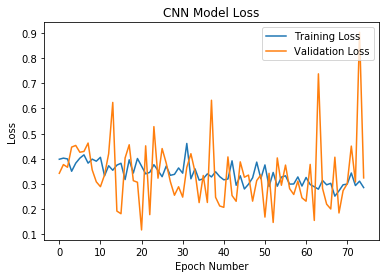

In [36]:
x = np.arange(0, epochs)
plt.figure()
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(x, cs_classification.history["loss"], label="Training Loss")
plt.plot(x, cs_classification.history["val_loss"], label="Validation Loss")

plt.title("CNN Model Loss")
plt.legend(loc="upper right")
print('loss: %.2f' %(np.amin(cs_classification.history["loss"])))
print('Validation loss: %.2f' %(np.amin(cs_classification.history["val_loss"])))


In [41]:
BCC_test_dir = 'cut_image/Test/BCC_test/'
FCC_test_dir = 'cut_image/Test/FCC_test/'

BCC_Prediction = np.zeros(test_samples)
FCC_Prediction = np.zeros(test_samples)
i=0
correct_count=0
for file in os.listdir(BCC_test_dir):
  predict_img = image.load_img(BCC_test_dir + file, target_size = (img_width, img_height))
  predict_img = image.img_to_array(predict_img)
  predict_img = np.expand_dims(predict_img, axis = 0)
  result = model.predict(predict_img)
  if np.round(result, 0) == 0:
    correct_count += 1
  else:
    pass
print('BCC prediction accuracy: %.2f' % ((correct_count / test_samples)*100) + '%')

i=0
correct_count=0
for file in os.listdir(FCC_test_dir):
  predict_img = image.load_img(FCC_test_dir + file, target_size = (img_width, img_height))
  predict_img = image.img_to_array(predict_img)
  predict_img = np.expand_dims(predict_img, axis = 0)
  result = model.predict(predict_img)
  if np.round(result, 0) == 0:
    correct_count += 1
  else:
    pass
print('FCC prediction accuracy: %.2f' % ((correct_count / test_samples)*100) + '%')

BCC prediction accuracy: 94.90%
FCC prediction accuracy: 89.80%


In [0]:
predict_img = image.load_img('download.png', target_size = (img_width, img_height))
predict_img = image.img_to_array(predict_img)
predict_img = np.expand_dims(predict_img, axis = 0)

result = np.round(model.predict(predict_img), decimals=0)
print(np.round(result, decimals=0))

[[1.]]
